## 5.4 Linear Regresion with Neural Network
https://github.com/johnnycode8/basic_neural_network

## 5.5 Import Library

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## 5.6 Define/Plot Data

In [30]:
# Known data points
X = np.array([-2, -1, 1, 2], dtype=np.float32)
Y = np.array([-2, -1, 0, 2], dtype=np.float32)

In [31]:
# Graph of the known data points
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(color='lightgray')
ax.axvline(color='lightgray')

## 5.7 Define Forward Pass Function  
$\hat{y}=wx$

In [40]:
# model prediction
def forward(w, x, b):
    # This is the correction Line function
    return w * x + b   

## 5.8 Guess Weight and Plot

y_prediceted: [-1.  -0.5  0.5  1. ]
Plot Data:


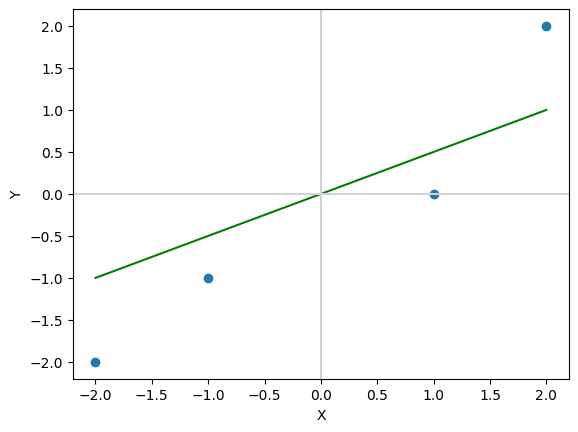

In [33]:
# Start with a random weight.
w = 0.5
b = 0.0
# Calculate predicted y values
y_predicted = forward(w, X, b)
print("y_prediceted:", y_predicted)

# Graph actual vs prediction
print("Plot Data:")
plt.figure()
ax = plt.subplot()
ax.scatter(X, Y)
ax.plot(X, y_predicted, 'green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(color='lightgray')
ax.axvline(color='lightgray')

## 5.9 Loss Function  
### Mean Square Error  
$MSE({y},\hat{y}) = \frac{1}{n} \Sigma_{i=1}^n({y}_i-\hat{y}_i)^2$

In [34]:
# MSE
def loss(y, y_predicted):
    return ((y - y_predicted)**2).mean()

## 5.10 Illustrate how weights affect losses

[-0.5, 0, 0.5, 1.5, 2, 2.5]
[5.125, 2.25, 0.625, 1.125, 3.25, 6.625]


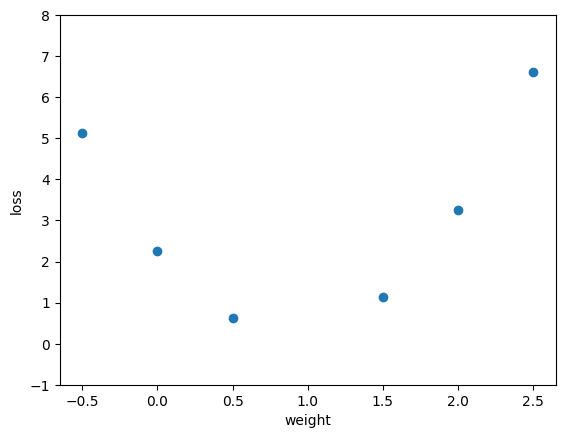

In [35]:
# Pick a bunch of random weights
W=[-0.5, 0, 0.5, 1.5, 2, 2.5]
b = 0
# List store the calculated losses
L=[]

# Calculate loss for each w
for w in W: 
    y_predicted = forward(w, X, b)
    L.append(loss(Y, y_predicted))

print(W)
print(L)

# Graph loss with respect to weight
plt.figure()
ax = plt.subplot()
ax.set_xlabel('weight')
ax.set_ylabel('loss')
ax.set_ylim(-1, 8)
ax.scatter(W, L)

## 5.11 Change in Loss with respect to Weight  
$\frac{\delta l}{\delta w} = \frac{1}{n}2x \Sigma_{i=1}^n(\hat{y}_i-{y}_i)$  

In [36]:
# gradient of loss wrt weight
def gradient_dl_dw(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

[-28.0, -18.0, -8.0, 12.0, 22.0, 32.0]


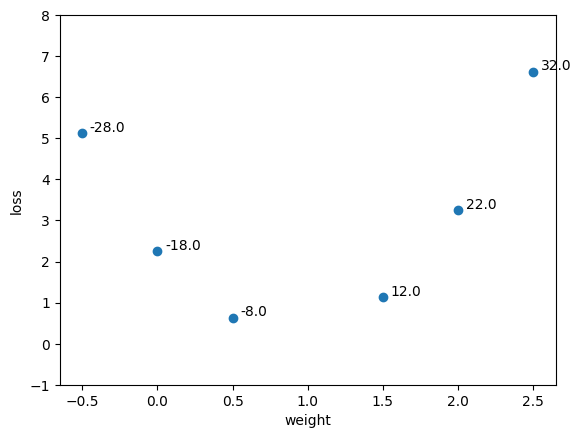

In [37]:
# Pick a bunch of random weights
W=[-0.5, 0, 0.5, 1.5, 2, 2.5]

# List store the calculated losses
L=[]

# List store the calculated gradients
G=[]
b = 0
# Calculate loss and gradient for each w
for w in W: 
    y_predicted = forward(w, X, b)
    L.append(loss(Y, y_predicted))
    G.append(gradient_dl_dw(X, Y, y_predicted))

print(G)

plt.figure()
ax = plt.subplot()
ax.set_xlabel('weight')
ax.set_ylabel('loss')
ax.set_ylim(-1, 8)
ax.scatter(W, L)

# Add gradient labels next to each point
for i, g in enumerate(G):
    plt.text(W[i]+.05, L[i]+.05, g, fontsize=10)

## 5.12 Change in Loss with respect to Bias
$\frac{\delta l}{\delta b} = \frac{1}{n}2 \Sigma_{i=1}^n(\hat{y}_i-{y}_i)$  

In [38]:
def gradient_dl_db(x, y, y_predicted):
    return np.dot(2, y_predicted-y).mean()

In [ ]:
##

In [39]:
# Training
learning_rate = 0.01
epochs = 500

w = 10
b = 10
for epoch in range(epochs):
    # forward pass
    # calculate predictions
    y_predicted = forward(w, X, b)

    # calculate losses
    l = loss(Y, y_predicted)

    # backpropagation
    # calculate gradients
    dw = gradient_dl_dw(X,Y, y_predicted)

    db = gradient_dl_db(X, Y, y_predicted)

    # gradient descent
    # update weights
    w -= learning_rate * dw

    b -= learning_rate * db

    # print info
    if(epoch % 1==0):
        print(f'epoch {epoch+1}: w={w:.3f}, b={b:.3f}, loss={l:0.8f}, dw={dw:.3f}, forward(10)={forward(w,10,b):0.3f}')
    

epoch 1: w=8.180, b=9.795, loss=312.25000000, dw=182.000, forward(10)=91.595
epoch 2: w=6.724, b=9.594, loss=233.56054688, dw=145.600, forward(10)=76.834
epoch 3: w=5.559, b=9.397, loss=181.86624146, dw=116.480, forward(10)=64.989
epoch 4: w=4.627, b=9.204, loss=147.50166321, dw=93.184, forward(10)=55.478
epoch 5: w=3.882, b=9.015, loss=124.27879333, dw=74.547, forward(10)=47.834
epoch 6: w=3.286, b=8.830, loss=108.23535156, dw=59.638, forward(10)=41.685
epoch 7: w=2.808, b=8.648, loss=96.83345032, dw=47.710, forward(10)=36.732
epoch 8: w=2.427, b=8.470, loss=88.44706726, dw=38.168, forward(10)=32.738
epoch 9: w=2.121, b=8.296, loss=82.03372955, dw=30.535, forward(10)=29.510
epoch 10: w=1.877, b=8.125, loss=76.92458344, dw=24.428, forward(10)=26.896
epoch 11: w=1.682, b=7.957, loss=72.68989563, dw=19.542, forward(10)=24.774
epoch 12: w=1.525, b=7.793, loss=69.05307007, dw=15.634, forward(10)=23.047
epoch 13: w=1.400, b=7.632, loss=65.83557129, dw=12.507, forward(10)=21.635
epoch 14: w=